Cleaned data preview:
                Industry                                         Occupation  \
0  Finance and Insurance                                            Tellers   
1  Finance and Insurance                                New Accounts Clerks   
2  Finance and Insurance                             Insurance Underwriters   
3  Finance and Insurance                  Insurance Appraisers, Auto Damage   
4  Finance and Insurance  Securities, Commodities, and Financial Service...   

                            Detailed Work Activities  \
0  Verify accuracy of financial or transactional ...   
1  Execute sales or other financial transactions....   
2  Analyze health-related data.Related occupation...   
3  Estimate costs of goods or services.Related oc...   
4  Negotiate prices or other sales terms.Related ...   

                                               Tasks Job Zone Image DTU  \
0  Balance currency, coin, and checks in cash dra...        2    Medium   
1  Perform telle

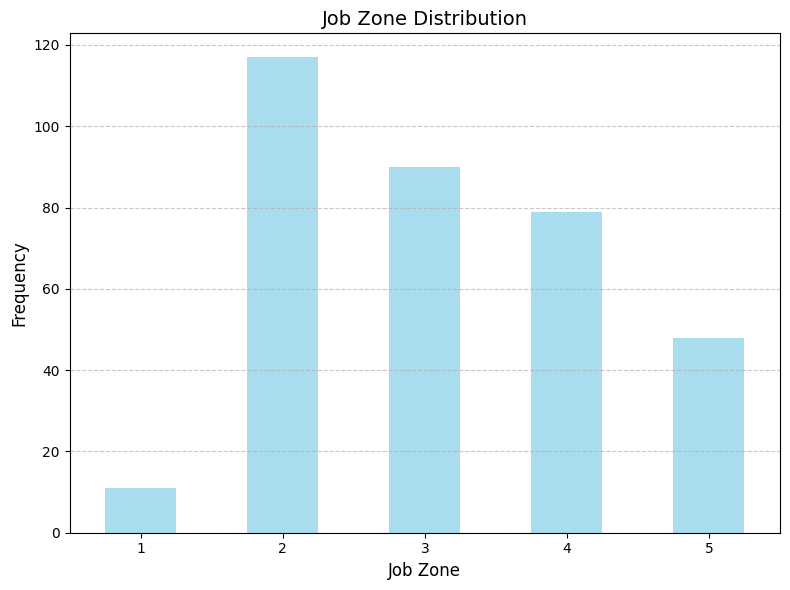

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/apoorva reddy/Downloads/dtu_job_zone_results_separate (2).csv'
data = pd.read_csv(file_path)

# Remove rows where 'Job Zone' column has the value "Unknown"
if 'Job Zone' in data.columns:
    data = data[data['Job Zone'] != "Unknown"]

# Inspect the cleaned data
print("Cleaned data preview:")
print(data.head())

# Count the occurrences of each 'Job Zone' value
job_zone_counts = data['Job Zone'].value_counts().sort_index()

# Plot the Job Zone Distribution
plt.figure(figsize=(8, 6))
job_zone_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Job Zone Distribution', fontsize=14)
plt.xlabel('Job Zone', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Columns in the dataset: Index(['Industry', 'Occupation', 'Detailed Work Activities', 'Tasks',
       'Job Zone', 'Image DTU', 'Audio DTU', 'Alphanumeric DTU',
       'Geographic DTU'],
      dtype='object')


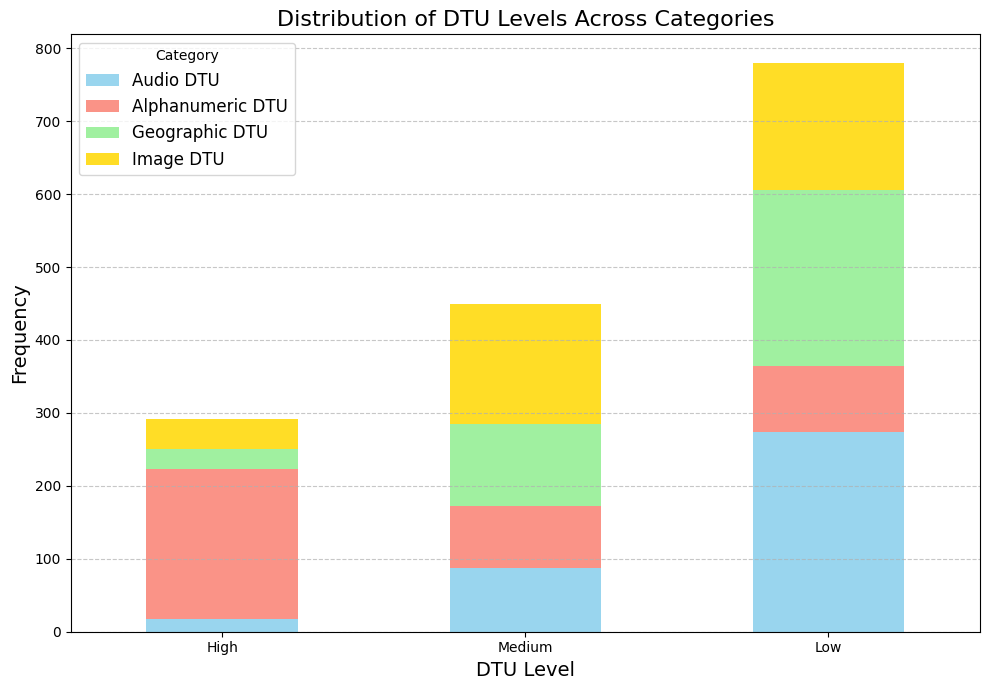

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/apoorva reddy/Downloads/dtu_job_zone_results_separate (2).csv'
data = pd.read_csv(file_path)

# Display the column names to verify their names
print("Columns in the dataset:", data.columns)

# Define the DTU columns
dtu_columns = ['Audio DTU', 'Alphanumeric DTU', 'Geographic DTU', 'Image DTU']

# Ensure the required columns exist
missing_columns = [col for col in dtu_columns if col not in data.columns]
if missing_columns:
    raise KeyError(f"The following DTU columns are missing: {missing_columns}")

# Clean the data: Replace 'Unknown' with NaN and drop rows with missing values
data = data.replace("Unknown", pd.NA).dropna(subset=dtu_columns)

# Count occurrences of each DTU level (e.g., High, Medium, Low) across categories
dtu_distribution = pd.DataFrame()

for level in ['High', 'Medium', 'Low']:
    dtu_distribution[level] = data[dtu_columns].apply(lambda x: (x == level).sum(), axis=0)

# Transpose to make DTU Levels the X-axis
dtu_distribution = dtu_distribution.transpose()

# Plot the stacked bar chart
dtu_distribution.plot(kind='bar', stacked=True, figsize=(10, 7), alpha=0.85, color=['skyblue', 'salmon', 'lightgreen', 'gold'])

# Add chart titles and labels
plt.title('Distribution of DTU Levels Across Categories', fontsize=16)
plt.xlabel('DTU Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Category', labels=dtu_columns, fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


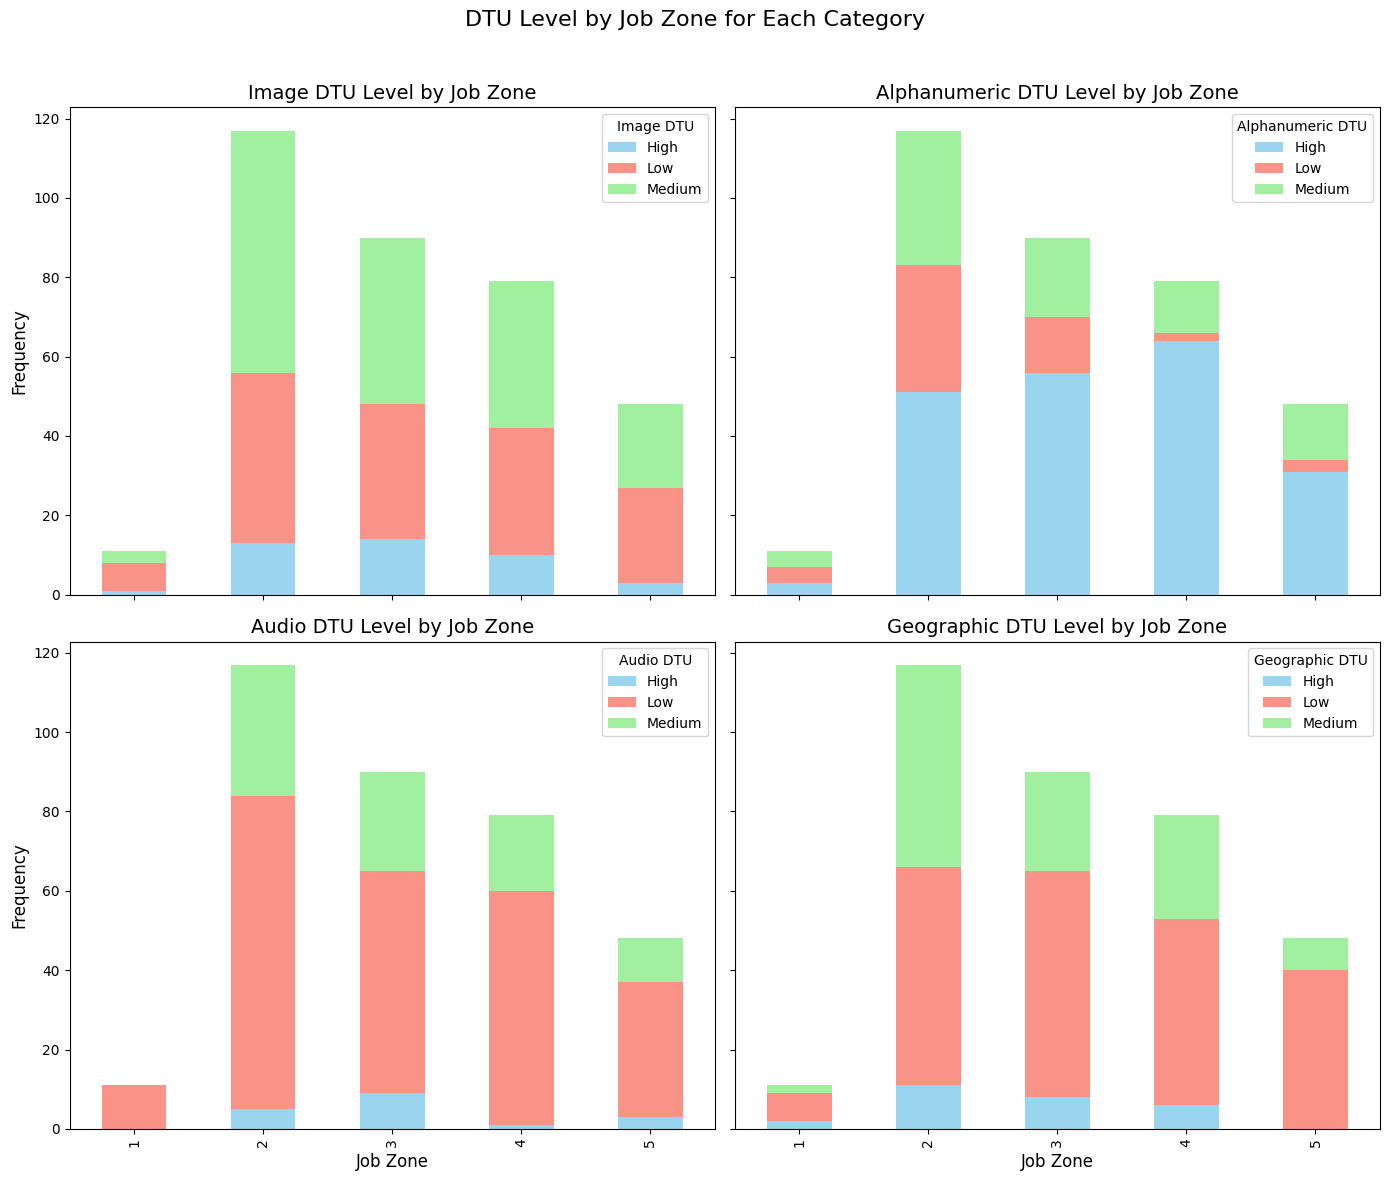

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/apoorva reddy/Downloads/dtu_job_zone_results_separate (2).csv'
data = pd.read_csv(file_path)

# Define the DTU columns and Job Zone column
dtu_columns = ['Image DTU', 'Alphanumeric DTU', 'Audio DTU', 'Geographic DTU']
job_zone_column = 'Job Zone'

# Ensure the required columns exist
missing_columns = [col for col in dtu_columns + [job_zone_column] if col not in data.columns]
if missing_columns:
    raise KeyError(f"The following columns are missing: {missing_columns}")

# Replace 'Unknown' with NaN and drop missing values
data = data.replace("Unknown", pd.NA).dropna(subset=dtu_columns + [job_zone_column])

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True, sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each DTU category in a separate subplot
for i, dtu in enumerate(dtu_columns):
    # Count occurrences of DTU levels (High, Medium, Low) by Job Zone
    dtu_distribution = data.groupby([job_zone_column, dtu]).size().unstack(fill_value=0)
    
    # Sort by Job Zone for consistency
    dtu_distribution = dtu_distribution.loc[sorted(dtu_distribution.index)]
    
    # Plot stacked bar chart
    dtu_distribution[['High', 'Low', 'Medium']].plot(
        kind='bar', stacked=True, ax=axes[i], alpha=0.85, color=['skyblue', 'salmon', 'lightgreen']
    )
    
    # Set titles and labels
    axes[i].set_title(f'{dtu} Level by Job Zone', fontsize=14)
    axes[i].set_xlabel('Job Zone', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].legend(title=dtu, fontsize=10)

# Set the overall title for the figure
fig.suptitle('DTU Level by Job Zone for Each Category', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


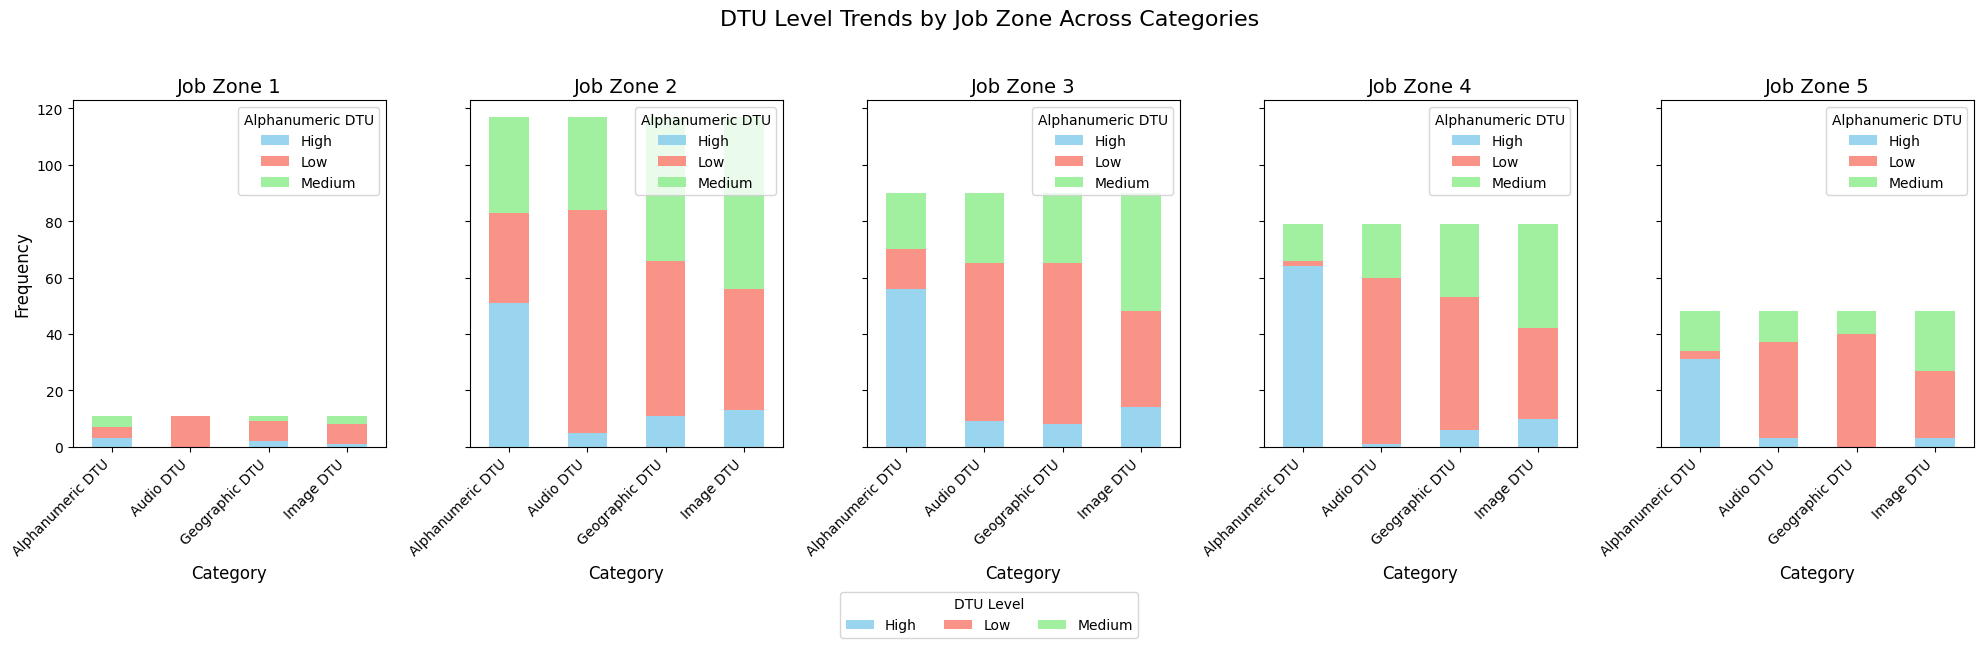

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/apoorva reddy/Downloads/dtu_job_zone_results_separate (2).csv'
data = pd.read_csv(file_path)

# Define the DTU columns and Job Zone column
dtu_columns = ['Alphanumeric DTU', 'Audio DTU', 'Geographic DTU', 'Image DTU']
job_zone_column = 'Job Zone'

# Ensure the required columns exist
missing_columns = [col for col in dtu_columns + [job_zone_column] if col not in data.columns]
if missing_columns:
    raise KeyError(f"The following columns are missing: {missing_columns}")

# Replace 'Unknown' with NaN and drop missing values
data = data.replace("Unknown", pd.NA).dropna(subset=dtu_columns + [job_zone_column])

# Get unique Job Zones
job_zones = data[job_zone_column].unique()

# Create subplots
fig, axes = plt.subplots(1, len(job_zones), figsize=(20, 6), sharey=True)

# Iterate through each Job Zone and create a grouped stacked bar chart
for i, job_zone in enumerate(sorted(job_zones)):
    # Filter data for the current Job Zone
    job_zone_data = data[data[job_zone_column] == job_zone]

    # Count occurrences of DTU levels for each category
    dtu_distribution = pd.DataFrame()
    for dtu in dtu_columns:
        dtu_distribution[dtu] = job_zone_data[dtu].value_counts()

    # Transpose for plotting
    dtu_distribution = dtu_distribution.fillna(0).transpose()

    # Plot the stacked bar chart
    dtu_distribution[['High', 'Low', 'Medium']].plot(
        kind='bar', stacked=True, ax=axes[i], alpha=0.85, color=['skyblue', 'salmon', 'lightgreen']
    )

    # Set titles and labels
    axes[i].set_title(f'Job Zone {job_zone}', fontsize=14)
    axes[i].set_xlabel('Category', fontsize=12)
    if i == 0:
        axes[i].set_ylabel('Frequency', fontsize=12)

    # Rotate X-axis labels for better readability
    axes[i].set_xticklabels(dtu_columns, rotation=45, ha='right')

# Set overall title
fig.suptitle('DTU Level Trends by Job Zone Across Categories', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a shared legend
fig.legend(['High', 'Low', 'Medium'], title='DTU Level', loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=3)

# Show the plot
plt.show()


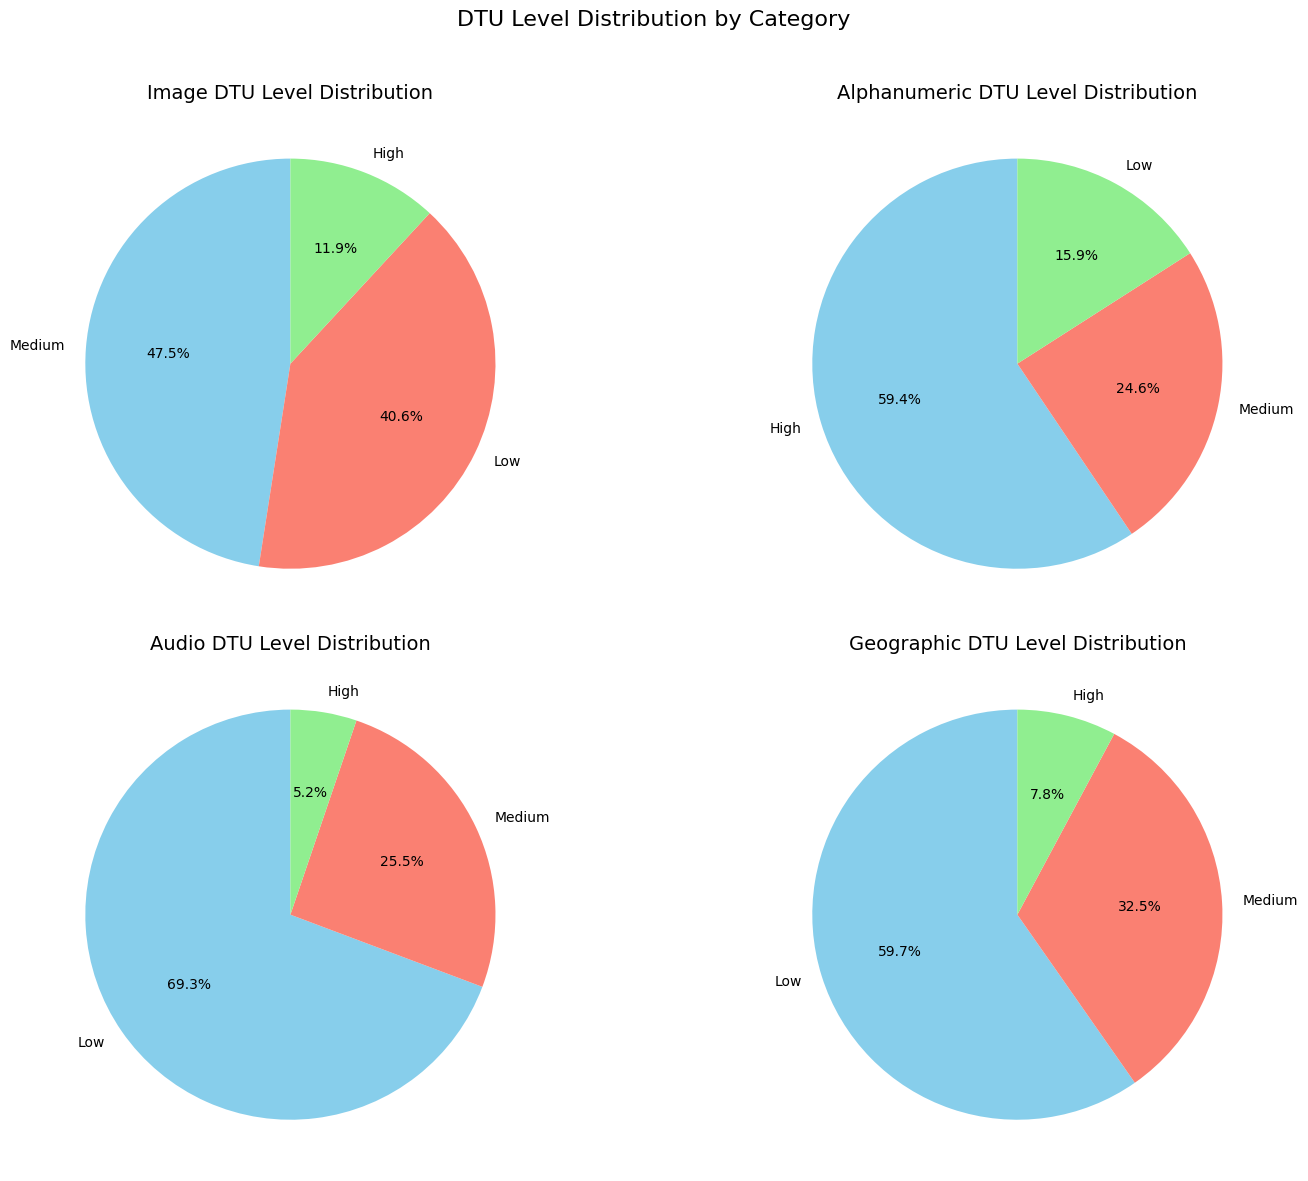

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/apoorva reddy/Downloads/dtu_job_zone_results_separate (2).csv'
data = pd.read_csv(file_path)

# Define the DTU columns and Job Zone column
dtu_columns = ['Image DTU', 'Alphanumeric DTU', 'Audio DTU', 'Geographic DTU']
job_zone_column = 'Job Zone'

# Ensure the required columns exist
missing_columns = [col for col in dtu_columns + [job_zone_column] if col not in data.columns]
if missing_columns:
    raise KeyError(f"The following columns are missing: {missing_columns}")

# Replace 'Unknown' with NaN and drop missing values
data = data.replace("Unknown", pd.NA).dropna(subset=dtu_columns + [job_zone_column])

# Create subplots for pie charts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Create a pie chart for each DTU category
for i, dtu in enumerate(dtu_columns):
    # Count occurrences of DTU levels for the current category
    level_counts = data[dtu].value_counts()

    # Plot the pie chart
    axes[i].pie(
        level_counts,
        labels=level_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'salmon', 'lightgreen'],
    )
    axes[i].set_title(f'{dtu} Level Distribution', fontsize=14)

# Set the overall title for the figure
fig.suptitle('DTU Level Distribution by Category', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()
